<img src="img/experiment_testing_tutorial_header.png" width=1400 />

# A standardized framework to test event-based experiments: A tutorial
In the past decade, there has been growing interest in the improvement of scientific practice, leading researchers to improve their application of statistical testing, increasing their sample sizes and stating their hypotheses a priorio using pre-registration. All these improvements however rely on the data to be collected properly. Surprisingly, very little attention has been given to testing and reporting critical parameters of the data collection. In our [paper](https://osf.io/preprints/psyarxiv/5ztnb), we describe a minimal protocol that can be followed to test all critical aspects of event-based experiments with minimal material and time investment. We also provide a shorthand report in [protocol.io](https://www.protocols.io/edit/testing-framework-protocol-cm8wu9xe) to ensure standard reporting and documentation of experimental setup performances in a given experiment.

## Dummy experiment
To illustrate our framework, we created a dummy experiment. This experiment consists of a 2 by 2 design in which stimuli of different **shapes** (squares and circles) are presented for 2 different **durations** (1.0 and 1.5s), for a total of **4 experimental conditions** (circle/1.0s, circle/1.5s, square/1.0, square/1.5s), **each repeated 20 times**. Each trial lasts 2.0s, starting with the stimulus (presented for the specified duration) followed by a blank screen. In between each trial, a random inter-trial interval is drawn from a uniform distribution between 0.5 and 1.5s. 

## Learning objectives
In this notebook, we will cover all the steps presented in the framework, to the exception of peripheral integration, to keep things simple. By the end of this notebook, you will know the following:
- Preparing your experiment to run the framework
- Check the visual angle of your stimuli
- Check and report the experiment log files accuracy
- Check and report the experimental setup timing accuracy

The numbering of each section in this notebook matches the sections in the [protocol.io](https://www.protocols.io/edit/testing-framework-protocol-cm8wu9xe)

In [60]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import mne
import numpy as np
from scipy.io import wavfile
from pathlib import Path

# 1. Testing preparation
Before running the check of your experiment, you should have programmed your experiment to a state where you could deploy it (i.e. use it on actual participants). 

<div class="alert alert-info"><h4>Note</h4><p> 
    The steps below have to be prepared before running the experiment.
</p></div>

## 1.1 Present the photodiode to test timing accuracy
You should add a key functionality to your experiment: presenting a photodiode square. To get a ground truth of the events timing, you should display a white square at the onset of each experimental event, which then turns back to black. We recommend presenting it in a corner of the display, like so (the dark square in the top right corner):
<div style="text-align: center;">
    <img src="img/Screenshot.png" alt="Centered Image" width="500"/>
</div>

You can find an example on how to present such a square under [drawPhotodiode.m](https://github.com/Cogitate-consortium/ExperimentTestingFramework/blob/main/dummyExperiment/drawPhotodiode.m) in psychtoolbox.

## 1.2 Record keyboard press sound
You should add a functionality to record audio from a contact microphone to your script. By recording the sound produced by button press, you can parse the recorded audio file to extract the time at which a button press occured, that can then be compared against the recorded time of button press by your experimental software to test timing accuracy. You can find an example on how to do so with psychtoolbox in the script [dummyExperiment.m](https://github.com/Cogitate-consortium/ExperimentTestingFramework/blob/main/dummyExperiment/dummyExperiment.m) at line 48 to 56

# 2. Create a pre-defined response sequence
In our dummy experiment, participants are supposed to press the right arrow when they see a circle and the left arrow when they see a square. To be able to test that the button being pressed matches the button being logged, we will execute the response sequence during our test run and compare it to what is being logged.
Here is the arbitrary response sequence we will perform for the first 15 trials:

| Trial | Button |
| :-: | :-: |
| 1 | Left |
| 2 | Left |
| 3 | Left |
| 4 | Left |
| 5 | Left |
| 6 | Right |
| 7 | Right |
| 8 | Right |
| 9 | Right |
| 10 | Right |
| 11 | Up |
| 12 | Up |
| 13 | Up |
| 14 | Up |
| 15 | Up |


# 3. Prepare for a test run:
## 3.1 Attach the photodiode
Finally, we will attach the photodiode recording device on top of the square that we have implemented, like so:
<div style="text-align: center;">
    <img src="img/Screenshot.png" alt="Centered Image" width="500"/>
</div>

TO BE UPDATED WITH AN ACTUAL PIC TAKEN IN THE LAB
## 3.2 Prepare to take notes of the presented events
In order to check that the information about the presented events recorded in the log files match the events that actually occured on the screen, you should will take notes of what happens on the screen. These notes can then be compared to the information found in the log files to ensure that the information that is logged is correct

## 4. Visual angle check
The first aspect to check is the size of the stimuli in degrees of visual angle. As stated above, the circle and square should occupy 6 degrees of visual angle. To fullfil our protocol, the following measures must be obtained:
- Screen height and width in pixels
- Screen height and width in centimeters
- Distance between participants nasion and screen
- Stimulus heights and width in centimeters

<div style="text-align: center;">
    <img src="img/stimMeasurement Circle.jpg" alt="Centered Image" width="500"/>
</div>

For the two first, we recommend finding the model of the screen and finding the exact specifications. The distance between the participants nasion and the screen as well as the stimulus size in centimeters must be measured manually. In our case, the screen distance was of **60cm** and the measured height and witdh of each stimulus was of **6.3cm**. Based of these measurements, we can now compute the size of the stimuli in degrees of visual angle, like so:  

In [61]:
width_cm = 6.3
height_cm = 6.3
dist_cm = 60
# Compute the size of the stimulus in radians
size_rad = 2 * math.atan((width_cm/2) / dist_cm)
# Convert to degrees
size_dva = size_rad * (180.0 / math.pi)
print('The stimulus size was of {} d.v.a.'.format(size_dva))


The stimulus size was of 6.010538719379868 d.v.a.


As we can see, we are pretty close of the expected 6 degrees. All measured values can be entered in the protocol in section 4. Note that in this particular experimental design, the eccentricity does not need to be reported, as the stimuli are presented centrally. 
<div style="text-align: center;">
    <img src="img/DVACheck.png" alt="Centered Image" width="500"/>
</div>

# 5. Controlled event content logging
The goal is to check that that the events that are being logged match what was presented on the screen. Unfortunately, this is achieved by manually annotating the stimuli that one is seeing and comparing it to what is presented in the log file, which is a bit time consuming. But this only needs to be done once. 

| Trial | Shape |
| :-: | :-------: |
| 1 | square |
| 2 | square |
| 3 | square |
| 4 | circle |
| 5 | circle |
| 6 | circle |
| ... | ... |

To achieve this, the experiment was started and I manually noted what was presented on a piece of paper. I did so for 20 trials in a row:
| Trial | Shape | Logged shape |
| :-: | :-: |:-: |
| 1 | square |square |
| 2 | square |square |
| 3 | square |square |
| 4 | circle |circle |
| 5 | circle |circle |
| 6 | circle |circle |
| ... | ... | ... |

This was then compared to the information that was logged. As we can see, the two sequences are the same, so we know that the logging is correct. Note that we are ignoring the duration condition for now, this will be tested more thoroughly in the next section. We can now fill the section 5 of the protocol:
<div style="text-align: center;">
    <img src="img/LogFileContent.png" alt="Centered Image" width="500"/>
</div>

# Running the experiment
<div class="alert alert-info"><h4>Note</h4><p> 
    Collecting the data required to perform the subsequent test can all be acquired within a single experimental run
</p></div>

Once you have conducted the tests above, you should run your experiment once more, making sure to respond according to your plan response sequence. This should yield the following files:
- Behavioral log files
- Photodiode signal
- Audio signal

Based of these files, you can now test all remaining aspects of your experiment

# 6. Uncontrolled events logging
YOu have prepared the response sequence in step 2., which you have executed as you conducted the experiment. You therefore know what was pressed, which you can now compare to the log file. Let's load the log file to check the recorded responses:

In [62]:
# Set path:
data_root = r"C:\Users\alexander.lepauvre\Documents\GitHub\ExperimentTestingFramework\dummyExperiment\TestData"
subID = "102"
# Load the log file:
log = pd.read_csv(Path(data_root, "sub-{}_ses-1_task-Dummy_events.csv".format(subID)))

# Print the logged responses:
print(log["response"].to_numpy()[0:15])

['left' 'left' 'left' 'left' 'left' 'right' 'right' 'right' 'right'
 'right' 'wrongKey' 'wrongKey' 'wrongKey' 'wrongKey' 'wrongKey']


According to the log file, the left key was pressed for the first 5 trials, then right for the next 5 trials and  then "wrongKey" for the next 5 trials. This corresponds to what is expected based on your planned response sequence as the button "up" does not corresponds to any relevant response in the context of our experiment. You can fill the secont 6 of our protocol.io:

<div style="text-align: center;">
    <img src="img/responseLoggingCheck.png" alt="Centered Image" width="500"/>
</div>

# 7. Controlled events timing
So far, we have been testing the experiment in terms of content: making sure that the stimuli are presented in the right way and that the correct content is being logged. Now, we will test that the timing of the events is correct. To that end, the experiment was ran once in our lab. The experiement was programmed such that whenever a new event occured, a square turned from black to white. We placed a photo-sensor over this square, which enabled us to record physical changes on the screen at the onset of each new event. This recording can then be analyzed to test the timing accuracy of our experiment. We will here show how this is performed.
In our experiment, there are three events in each trial:
- Stimulus onset
- Stimulus offset
- Trial end/Start of the ITI

Using the photodiode, we can measure the actual occurence of these events to ensure that our experiment is behaving properly in term of timing. In other words, we want to make sure that the events occur at the time they are supposed to and last for as long as we expect them to last. 

In [63]:
# Loading the photodiode data:
raw = mne.io.read_raw_brainvision(Path(data_root, "sub{}.vhdr".format(subID)), preload=True)
photo_channel = "Fp1"

Extracting parameters from C:\Users\alexander.lepauvre\Documents\GitHub\ExperimentTestingFramework\dummyExperiment\TestData\sub102.vhdr...
Setting channel info structure...
Reading 0 ... 272739  =      0.000 ...   272.739 secs...


Once the data are loaded, the first step is to plot the photodiode signal. The signal should contain stark bursts corresponding to a change from the square being black to white, marking the onset of an event. By checking the signal, we can set a threshhold to detect when the square was "on"

Text(0.5, 0, 'Time (s)')

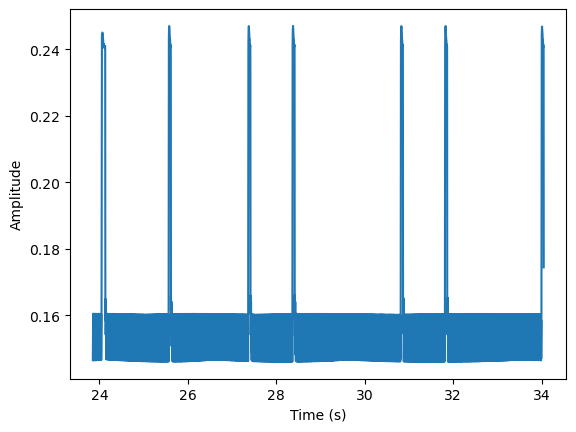

In [64]:
# Extract the photodiode signal:
pd_signal = np.squeeze(raw.get_data(picks=photo_channel))
# Find the first peak:
first_peak = np.where(pd_signal > 0.2)[0][0]
# PLot part of the signal:
fig, ax = plt.subplots()
ax.plot(raw.times[first_peak-200:first_peak + 10000], pd_signal[first_peak-200:first_peak + 10000])
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (s)")

We can clearly see the peaks in the signal above. There is quite some noise between 0.14 and 0.165 (units are mV, but it does not matter here), but the peaks are clearly above the noise and setting a threshold at **0.18** ensures that we do not get false positive (i.e. detecting that the square was turned white when it fact is remained black). Based on this threshol, we can binarize the signal to clean it up.

Text(0.5, 1.0, 'Binarized photodiode signal')

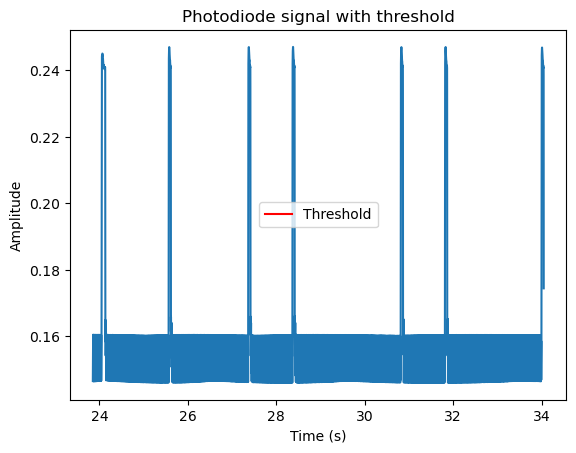

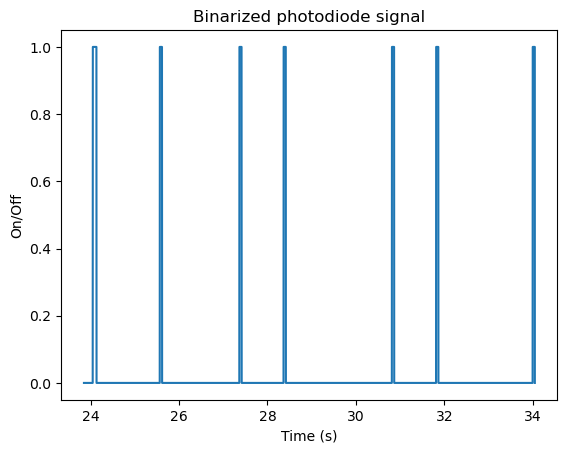

In [65]:
# Set our threshold:
thresh = 0.18

# Display the signal with the threshold:
fig, ax = plt.subplots()
ax.plot(raw.times[first_peak-200:first_peak + 10000], pd_signal[first_peak-200:first_peak + 10000])
ax.axhline(thresh, raw.times[first_peak-200], raw.times[first_peak + 10000], c='r', label='Threshold')
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (s)")
ax.set_xlim
ax.set_title("Photodiode signal with threshold")
plt.legend()

# Binarizing the signal:
pd_bin = (pd_signal > thresh).astype(int)
fig, ax = plt.subplots()
ax.plot(raw.times[first_peak-200:first_peak + 10000], pd_bin[first_peak-200:first_peak + 10000])
ax.set_ylabel("On/Off")
ax.set_xlabel("Time (s)")
ax.set_title("Binarized photodiode signal")

Now that we have cleaned up the signal, we can detect the onset of each event. Remember that in our experiment, the square was flashed white at the beginning of each event and then turned black again after a bit. Therefore, the onset of a new stimulus can be identified by detecting when the photodiode signal turns "on". This is achieved very simply by taking the discrete difference of the binarized photodiode signal. The discrete difference simply subtract to each sample the value of the preciding sample. The binarized signal contains only ones and zeros, so the discrete difference can yield only 3 different values: 0 (no difference to previous sample), 1 (current sample is 1 while previous is 0) and -1 (current sample is 0 but previous sample is 1). We are only interested in the sample where the discrete difference yields a 1, as it corresponds to the time point where the square turned white.

Text(0.5, 1.0, 'Binarized photodiode signal')

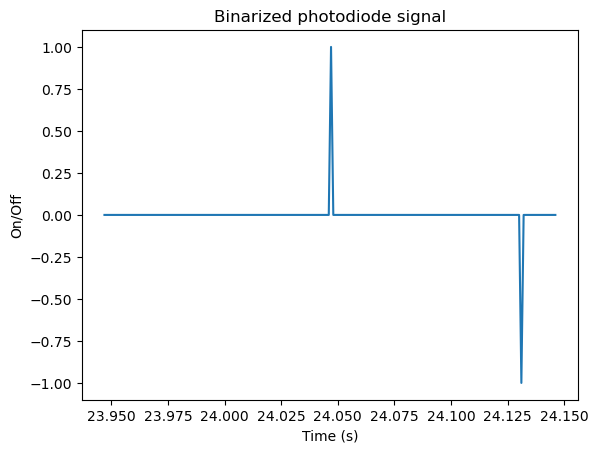

In [66]:
# Compute the discrete difference of the signal:
pd_diff = np.diff(pd_bin)
# Plot the signal to illustrate what that looks like:
fig, ax = plt.subplots()
ax.plot(raw.times[np.where(pd_diff==1)[0][0] - 100:np.where(pd_diff==1)[0][0] + 100], pd_diff[np.where(pd_diff==1)[0][0] - 100:np.where(pd_diff==1)[0][0] + 100])
ax.set_ylabel("On/Off")
ax.set_xlabel("Time (s)")
ax.set_title("Binarized photodiode signal")

As we can see, we have 2 peaks for this particular event: the first marks the transition of the photodiode from black to white and the other one marks the opposite. We can now obtain the time stamps of each events according to the photodiode like so

In [67]:
# Extract the times stamps  from the photodiode:
pd_ts = raw.times[np.where(pd_diff==1)[0]]

# Check that the length is the same as the log file:
print("{} events detected in the photodiode signal".format(pd_ts.shape[0]))
print("{} events present in the log file".format(log.shape[0] * 2))
assert log.shape[0] * 2 == pd_ts.shape[0], "Different number of events in the log file compared to the photodiode signal!"

160 events detected in the photodiode signal
160 events present in the log file


Assuming all the above steps proceeded without any issues, we can now move on to the last step, in which we compute the interval between the events measured by the log files and compare it to the ground truth of the photodiode. To ensure that there are no misalignment between the two, we overlay the plot of the intervals of the log file with the photodiode. Provided that there are no issues, then we can compare the intervals from the log file and from the photodiode to test the timing accuracy.

Text(0.5, 1.0, 'Timing inaccuaracies (Log - Photo)')

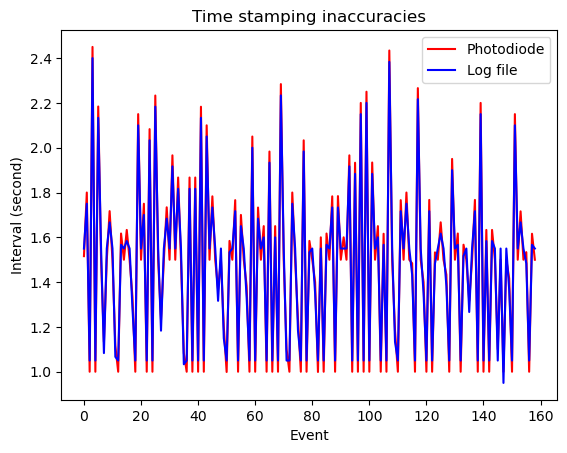

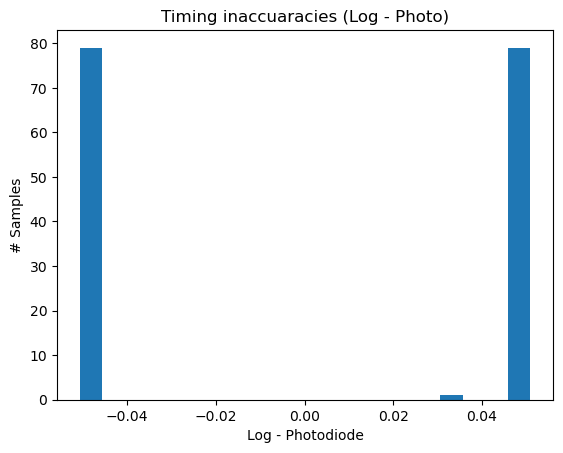

In [68]:
# Compute the intervals from both the photodiode and the log file:
pd_interval  = np.diff(pd_ts)
log_interval = np.diff(log[["stimOnset", "stimOffset"]].to_numpy().flatten())
# Overlay the two signals:
fig, ax = plt.subplots()
ax.plot(pd_interval, c="r", label="Photodiode")
ax.plot(log_interval, c="b", label="Log file")
ax.set_ylabel("Interval (second)")
ax.set_xlabel("Event")
ax.set_title("Time stamping inaccuracies")
plt.legend()

# Plot the distribution of the difference between the two:
fig, ax = plt.subplots()
ax.hist(log_interval - pd_interval, bins=20)
ax.set_ylabel("# Samples")
ax.set_xlabel("Log - Photodiode")
ax.set_title("Timing inaccuaracies (Log - Photo)")

We we can see, there  are some timestamping inaccuracies. To report them, compute the mean and standard deviation of the interval difference. Then, we can fill the protocol:

In [69]:
mean_diff = np.mean(log_interval - pd_interval)
std_diff  = np.std(log_interval - pd_interval)
print("The timing inaccuracy is of {:.3f}+-{:.3f} sec.".format(mean_diff, std_diff))

The timing inaccuracy is of 0.000+-0.050 sec.


Based on all these information, you can now fill section 7 of the protocol:

<div style="text-align: center;">
    <img src="img/photodiodeThreshold.png" alt="Centered Image" width="500"/>
</div>

<div style="text-align: center;">
    <img src="img/logTimingAccuracy.png" alt="Centered Image" width="500"/>
</div>

# 8. Uncontrolled events timing
The uncontrolled events refer to event which are not under the control of the experimental script but rather depends on user input, such as responses to a given stimulus. To obtain reaction time to a particular event, the difference between the timestamp of an event and the timestamp of the corresponding button press are computed. The aim of the previous section was to ensure that the timestamps of the controlled events (i.e. stimulus presentation) is accurate. The accuracy of the reaction time data however require both the timestamping of the stimulus and of the button press to be accurate. The aim of this section is to test the accuracy of the button press timestamping. To that end, we recorded the sound associated with the button press using a contact microphone. In this section, we highlight the parsing of the audio file to extract the button press timestamps. This can then be compared with the timestamp of the button press recorded in the log file to estimate accuracy. 

In [70]:
# Loading the audio data:
audio_file = Path(data_root, "sub-{}_ses-1_task-Dummy_audio.wav".format(subID))
samplerate, data = wavfile.read(audio_file)

# Plot the data:
# PLot part of the signal:
fig, ax = plt.subplots()
ax.plot(data)
ax.set_ylabel("Amplitude")
ax.set_xlabel("Time (s)")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\alexander.lepauvre\\Documents\\GitHub\\ExperimentTestingFramework\\dummyExperiment\\TestData\\sub-102_ses-1_task-Dummy_audio.wav'

## Validating the experimental design parameters
We are almost there. All the tests so far ensures that the information are precise and accurate both in terms of timing and content. The last thing we have to test is that the experimental design that we expect is respected, which hasn't been explicitely tested so far. Here is what we will test here:
- Count of trials per condition
- Test the expected duration against observed duration

### Count of trials
As we have tested the log file in previous steps, we can be confident that the information it contains truly reflect what occured in the experiment in terms of content. So we can simply count the number of events in each condition to make sure that the counts match what we expect. As stated in the beginning of the experiment, we have 4 conditions, each presented 20 times. We will check whether this is the case:

In [71]:
nTrials = log.shape[0]
count_df = log.groupby(['duration', 'shape']).size().reset_index(name='count')
print("N trials total = {}".format(nTrials))
print("N trials per condition")
print(count_df)

N trials total = 80
N trials per condition
   duration   shape  count
0       1.0  circle     20
1       1.0  square     20
2       1.5  circle     20
3       1.5  square     20


We have 20 trials for each of the conditions, which is in line with our expected experimental design. This can be repored in the protocol.io under the section 9:
<div style="text-align: center;">
    <img src="img/trialNumbersCheck.png" alt="Centered Image" width="500"/>
</div>

### Expected duration
Finally, we need to test whether the duration for which the events were presented matches the experimental design: we presented stimuli for either 1.0 and 1.5s. We need to make sure that we presented for the right duration in each of the trials. We have tested the log file timestamping to make sure that they are accurate. However, there may  always be some inaccuracies in log file timestamping. We recommend using the photodiode instead, as it constitutes the ground truth in terms of events timings. We will compare the duration of the stimuli that was observed in each of the trial against the duration that was expected from the log file:

The timing inaccuracy is of 0.000+-0.002 sec.


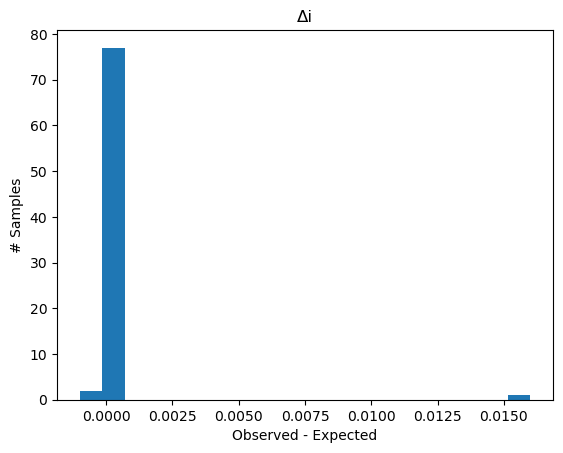

In [72]:
# Extract the observed duration of the stimuli. In our case, it is every second entry of the photodiode interval:
obs_duration = pd_interval[0::2]

# Compute the difference between the observed duration and the expected duration (deltai in our paper):
delta_i = obs_duration - log["duration"].to_numpy()

# Plot as a histogram:
fig, ax = plt.subplots()
ax.hist(delta_i, bins=20)
ax.set_ylabel("# Samples")
ax.set_xlabel("Observed - Expected")
ax.set_title("Δi")

# Compute the mean and the standard deviation. It should be close to 0:
mean_diff = np.mean(delta_i)
std_diff  = np.std(delta_i)
print("The timing inaccuracy is of {:.3f}+-{:.3f} sec.".format(mean_diff, std_diff))

As we can see, this is quite accurate. Most trials were displayed for exactly the duration we expected. In a few trials, the stimuli were displayed for ~16ms more than expected, which indicates that a skipped frame occureed in a minority of the trials, which isn't too alarming. We can report the results of this test in the section 10 of the protocol.io as follows:
<div style="text-align: center;">
    <img src="img/plannedDurationCheck.png" alt="Centered Image" width="500"/>
</div>

If necessary for your purpose, you can go further and test whether the duration of events other than the stimuli match what you expect. In our experiment for example, each trial last for 2s plus some jitter (which was also logged). So the expected interval between each stimulus is therefore the 2s - the duration of the stimulus of that trial + the inter-trial interval. We can compare this  expected interval against the photodiode to make sure that the other events also have the correct duration:

The timing inaccuracy is of -0.000+-0.000 sec.


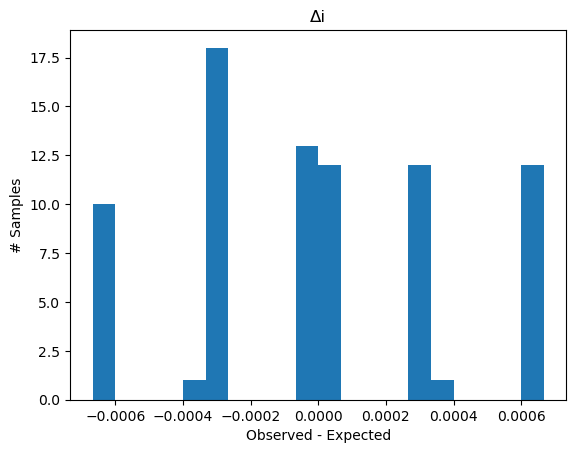

In [73]:
# Extract the observed duration of the stimuli. In this case, it is every second entry of the photodiode interval starting from 1 instead of 0:
obs_duration = pd_interval[1::2]
expected_duration = 2.0 - log["duration"].to_numpy() + log["iti"].to_numpy()
# Compute the difference between the observed duration and the expected duration (deltai in our paper):
delta_i = obs_duration - expected_duration[:-1]

# Plot as a histogram:
fig, ax = plt.subplots()
ax.hist(delta_i, bins=20)
ax.set_ylabel("# Samples")
ax.set_xlabel("Observed - Expected")
ax.set_title("Δi")

# Compute the mean and the standard deviation. It should be close to 0:
mean_diff = np.mean(delta_i)
std_diff  = np.std(delta_i)
print("The timing inaccuracy is of {:.3f}+-{:.3f} sec.".format(mean_diff, std_diff))

As we can see, this is even more precise, all differences are below a millisecond, which indicates that our experiment is very much in line with what will be reported in the method section of the paper!

# Exporting the results of the protocol:
Once you have performed the tests necessary for your purpose and filled out the protocol.io, you can export it as a pdf. You can find the example for the current experiment under [DummyExperimentTestingProtocol.pdf](https://github.com/Cogitate-consortium/ExperimentTestingFramework/blob/main/DummyExperimentTestingProtocol.pdf)